In [9]:
!git clone https://github.com/dtylor/WalkRNN.git
%cd WalkRNN
!ls

Cloning into 'WalkRNN'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 357 (delta 15), reused 0 (delta 0), pack-reused 326
Receiving objects: 100% (357/357), 1.14 MiB | 7.10 MiB/s, done.
Resolving deltas: 100% (195/195), done.
/content/WalkRNN
AIDS			 GraphLM_walk_AIDS.py	module.py	  README.md
Cuneiform		 graphwave		Motivation.ipynb  test.py
data			 __init__.py		MUTAG.ipynb	  TODO
Demonstration.ipynb	 LICENSE-3RD-PARTY.txt	n2v		  utilities.py
GraphLM_walk_AIDS.ipynb  LICENSE.md		OrgChart.ipynb


In [1]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0   1487      0 --:--:-- --:--:-- --:--:--  1487
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
import fastai
import pandas as pd

In [3]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.1.0
nvidia driver : 418.67
torch cuda    : 10.0.130 / is available
torch cudnn   : 7501 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run t

In [4]:
str(fastai.__dict__['version'])
!more /usr/local/lib/python3.6/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.57'


In [5]:
!ls

sample_data


In [0]:
from google.colab import drive

In [7]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels

node_mappings = [{
    	0:	"depthPoint",
	    1:	"tailVertex",
	    2:	"leftVertex",
	    3:	"rightVertex"},{
    	0:	"vertical",
	    1:	"Winkelhaken",
	    2:	"horizontal"}]

edge_mappings = {	0:	"wedge",	1:	"arrangement"}

label_maps={"node_labels": node_mappings, "edge_labels": edge_mappings}

G = load_graph_kernel_graph("./Cuneiform", mappings=label_maps,params={'num_kmeans_clusters': 3, "num_pca_components": 6, "num_batch":500, 'num_att_kmeans_clusters': 5})
y = load_graph_kernel_labels("./Cuneiform")



finished graphwave_alg batches
DONE


In [0]:
import matplotlib.pyplot as plt
import networkx as nx
# create number for each group to allow use of colormap
from itertools import count


def plotGW(tmpG, comp_no):
 # get unique groups
 groups = set(nx.get_node_attributes(tmpG,'structure').values())

 mapping = dict(zip(sorted(groups),count()))
  
 comp_nodes = [x for x,y in tmpG.nodes(data=True) if y['component']==comp_no]
 print(len(comp_nodes))
 subgraph = tmpG.subgraph(comp_nodes)
 nodes = subgraph.nodes()
 colors = [mapping[subgraph.node[n]['structure']] for n in nodes]

 # drawing nodes and edges separately so we can capture collection for colobar
 pos = nx.spring_layout(subgraph)
 ec = nx.draw_networkx_edges(subgraph, pos, with_labels=True,alpha=0.2)
 nc = nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=100, cmap=plt.cm.jet, vmin=0,vmax=3)
 plt.colorbar(nc)
 plt.axis('off')
 plt.show()
 print(nx.get_node_attributes(subgraph,'structure'))
 

36


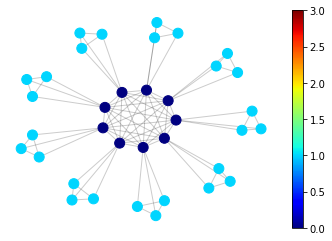

{1: 15, 2: 16, 3: 16, 4: 16, 5: 15, 6: 16, 7: 16, 8: 16, 9: 15, 10: 16, 11: 16, 12: 16, 13: 15, 14: 16, 15: 16, 16: 16, 17: 15, 18: 16, 19: 16, 20: 16, 21: 15, 22: 16, 23: 16, 24: 16, 25: 15, 26: 16, 27: 16, 28: 16, 29: 15, 30: 16, 31: 16, 32: 16, 33: 15, 34: 16, 35: 16, 36: 16}


In [12]:

plotGW(G,1)

28


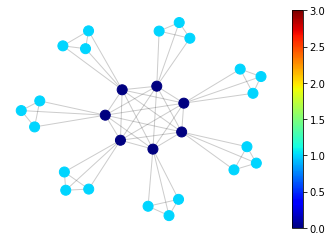

{37: 15, 38: 16, 39: 16, 40: 16, 41: 15, 42: 16, 43: 16, 44: 16, 45: 15, 46: 16, 47: 16, 48: 16, 49: 15, 50: 16, 51: 16, 52: 16, 53: 15, 54: 16, 55: 16, 56: 16, 57: 15, 58: 16, 59: 16, 60: 16, 61: 15, 62: 16, 63: 16, 64: 16}


In [13]:
plotGW(G,2)

16


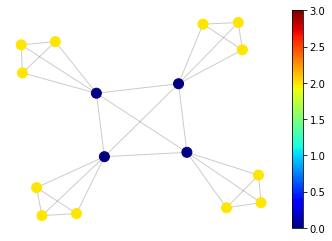

{65: 15, 66: 17, 67: 17, 68: 17, 69: 15, 70: 17, 71: 17, 72: 17, 73: 15, 74: 17, 75: 17, 76: 17, 77: 15, 78: 17, 79: 17, 80: 17}


In [14]:
plotGW(G,3)

28


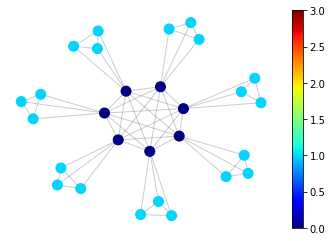

{5297: 15, 5298: 16, 5299: 16, 5300: 16, 5301: 15, 5302: 16, 5303: 16, 5304: 16, 5305: 15, 5306: 16, 5307: 16, 5308: 16, 5309: 15, 5310: 16, 5311: 16, 5312: 16, 5313: 15, 5314: 16, 5315: 16, 5316: 16, 5317: 15, 5318: 16, 5319: 16, 5320: 16, 5321: 15, 5322: 16, 5323: 16, 5324: 16}


In [15]:
plotGW(G,251)

16


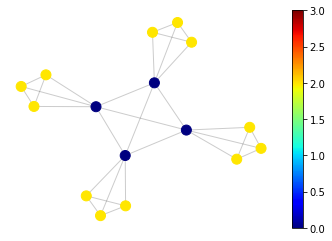

{192: 17, 193: 15, 194: 17, 195: 17, 196: 17, 197: 15, 198: 17, 199: 17, 200: 17, 185: 15, 186: 17, 187: 17, 188: 17, 189: 15, 190: 17, 191: 17}


In [16]:
plotGW(G,11)

24


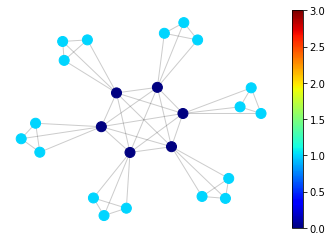

{5477: 15, 5478: 16, 5479: 16, 5480: 16, 5481: 15, 5482: 16, 5483: 16, 5484: 16, 5485: 15, 5486: 16, 5487: 16, 5488: 16, 5489: 15, 5490: 16, 5491: 16, 5492: 16, 5493: 15, 5494: 16, 5495: 16, 5496: 16, 5497: 15, 5498: 16, 5499: 16, 5500: 16}


In [17]:
plotGW(G,260)

16


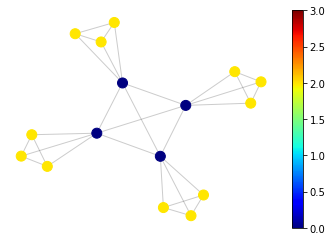

{352: 17, 337: 15, 338: 17, 339: 17, 340: 17, 341: 15, 342: 17, 343: 17, 344: 17, 345: 15, 346: 17, 347: 17, 348: 17, 349: 15, 350: 17, 351: 17}


In [18]:
plotGW(G,18)

28


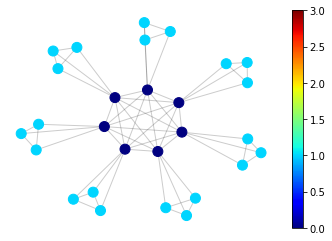

{2944: 16, 2917: 15, 2918: 16, 2919: 16, 2920: 16, 2921: 15, 2922: 16, 2923: 16, 2924: 16, 2925: 15, 2926: 16, 2927: 16, 2928: 16, 2929: 15, 2930: 16, 2931: 16, 2932: 16, 2933: 15, 2934: 16, 2935: 16, 2936: 16, 2937: 15, 2938: 16, 2939: 16, 2940: 16, 2941: 15, 2942: 16, 2943: 16}


In [19]:
plotGW(G,140)

In [0]:
from module import walk_as_string

In [21]:
walks = walk_as_string(G, componentLabels = y)

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/content/WalkRNN/module.py:140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[ 1 33 21 29 33 17 19 18 20 18 17  5  8  5 17 18 20 17  1 29 30 32 31 32 31 29 13 15 14 16]
[ 1 25 21 22 21 25 27 25  5  7  5 33 34 33 34 36 35 36 35 34 33 34 35 34 35 36 33 34 35 34]
[ 1  5 29 21  1  9 12 11 12 11 10 11 12  9 11 10 11 10  9  1 29  9 11 10 12  9 10 12 11  9]


In [0]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy

In [23]:
walks.head()

,walk,label,start_node,component
0,2 13 15 18 9 21 29 31 33 0 11 15 19 5 21 27 31...,0,1,1
1,2 13 15 18 9 21 29 31 36 0 10 15 19 8 21 27 31...,0,1,1
2,2 13 15 18 9 21 29 31 36 0 10 15 19 5 21 27 31...,0,1,1
3,2 13 15 18 9 21 27 31 32 2 10 15 20 7 21 27 31...,0,1,1
4,2 13 15 18 9 21 29 31 36 0 10 15 19 5 21 25 30...,0,1,1


In [24]:
walks.shape

(113600, 4)

In [0]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [26]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(81680, 4)

In [27]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(11280, 4)

In [28]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(20640, 4)

In [0]:
!mkdir result
mypath = './result'

In [0]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [0]:
data_lm.save('data_lm.pkl')

In [32]:
!ls -l ./result

total 291076
-rw-r--r-- 1 root root 298055040 Sep 27 20:01 data_lm.pkl


In [0]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm.pkl', bs=bs)


In [34]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,25 30 32 2 12 16 20 7 24 25 30 32 2 12 16 20 6 22 25 30 32 2 12 15 20 7 21 25 31 32 0 10 15 19 5 21 25 30 32 2 10 16 19 7 24 25 30 32 0 10 15 19 5 21 25 31 32 2 12 15 20 7 21 25 30 32 2 12 16 20
1,22 25 30 32 2 11 15 19 7 21 25 31 36 2 10 15 18 7 21 25 30 32 2 10 17 18 7 24 25 30 32 2 10 17 18 7 23 25 30 32 2 10 15 18 7 21 25 30 32 2 12 17 18 7 22 25 30 32 2 10 17 18 7 23 xxbos 2 10 17 18 6
2,25 30 32 1 11 16 20 8 23 25 30 32 1 11 15 20 8 21 29 31 33 4 13 15 18 9 21 25 30 32 4 13 16 18 9 24 25 30 32 4 11 16 18 9 22 25 30 32 4 13 16 18 9 24 25 30 32 4 11 16 18 9 22 25 30 32 4 13 15 18
3,22 25 30 32 1 10 15 20 8 21 29 31 36 4 13 15 18 9 21 26 31 34 4 11 15 19 9 21 25 30 32 4 11 16 19 6 23 25 30 32 4 11 15 19 9 21 25 30 32 4 12 16 19 9 24 25 30 32 4 11 16 19 6 23 xxbos 1 11 16 20 8
4,25 30 32 2 10 15 20 8 21 25 31 34 2 11 15 20 5 21 25 30 32 1 14 16 20 9 22 25 30 32 2 11 15 20 5 21 28 31 34 1 10 15 18 9 21 28 31 32 2 10 15 20 8 21 26 31 32 1 10 15 18 6 21 26 31 32 1 10 15 18


In [0]:
awd_lstm_lm_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.412016,0.414928,0.824970,05:26


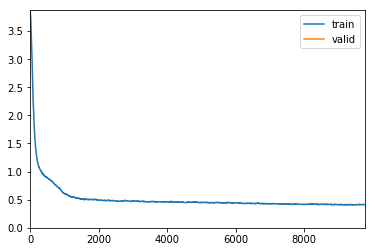

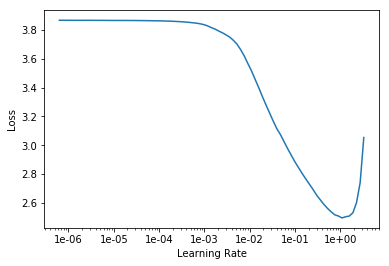

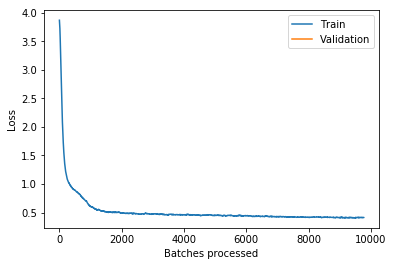

In [36]:

learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.9, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


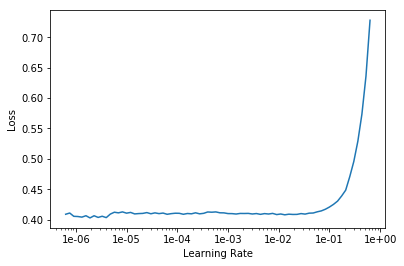

In [37]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.432733,0.432193,0.817882,05:26
1,0.428267,0.425297,0.820568,05:25
2,0.388631,0.422803,0.823982,05:25
3,0.386116,0.420787,0.824917,05:25


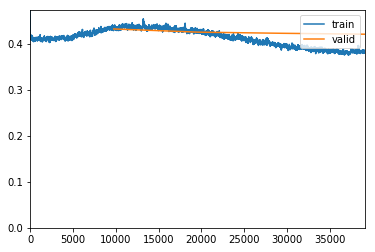

In [38]:
learn.fit_one_cycle(4, .01, moms=(0.8,0.7))

In [0]:
learn.save('fit-head')

In [0]:
learn.save_encoder('fine_tuned_enc3')

In [41]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==1].head()


,walk,label,start_node,component,index1,RN
6,0 10 16 19 5 24 25 30 32 0 12 16 19 8 22 25 30...,0,28,1,6,1.0
143,2 11 16 20 7 23 25 30 32 2 11 16 20 6 22 25 30...,0,15,1,143,2.0
200,0 12 16 19 8 23 25 30 32 0 12 16 19 8 22 25 30...,0,27,1,200,3.0
538,0 11 16 19 8 23 25 30 32 0 11 15 19 5 21 27 31...,0,31,1,538,4.0
598,0 14 16 19 5 22 25 30 32 0 11 15 19 5 21 25 31...,0,34,1,598,5.0


Choose a path per node and concatenate for entire component

In [42]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=9.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
1,0,0 10 16 19 5 24 25 30 32 0 12 16 19 8 22 25 30...
2,1,1 13 15 18 7 21 26 31 34 2 11 15 20 5 21 25 30...
3,2,4 11 17 19 7 24 25 30 32 4 11 17 19 5 23 25 30...
4,3,2 14 17 19 6 22 25 30 32 2 10 17 19 6 24 25 30...
5,4,1 12 17 19 7 23 25 30 32 1 12 15 19 6 21 25 30...


In [43]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

,label,text,component
comp,,,
1,0,0 10 16 19 5 24 25 30 32 0 12 16 19 8 22 25 30...,1
2,1,1 13 15 18 7 21 26 31 34 2 11 15 20 5 21 25 30...,2
3,2,4 11 17 19 7 24 25 30 32 4 11 17 19 5 23 25 30...,3
4,3,2 14 17 19 6 22 25 30 32 2 10 17 19 6 24 25 30...,4
5,4,1 12 17 19 7 23 25 30 32 1 12 15 19 6 21 25 30...,5


In [44]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((192, 3), (48, 3), (27, 3), 0.7191011235955056)

In [0]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [0]:
data_clas.save('tmp_clas')

In [0]:
data_clas = load_data(mypath, 'tmp_clas', bs=bs)


In [48]:
data_clas.show_batch()

text,target
xxbos 1 12 17 19 5 23 25 30 32 1 12 15 19 7 21 25 31 32 1 12 15 19 7 21 25 30 32 1 11 17 19 7 22 25 30 32 1 12 17 19 7 23 25 30 32 1 10 17 19 7 24 25 30 32 1 12 17 19 7 23 25 30 32 1 10 17 19 7 24,17
xxbos 0 11 17 20 7 21 25 31 32 0 12 17 19 6 21 25 30 32 0 10 17 19 6 24 25 30 32 0 11 17 19 7 23 25 30 32 2 11 17 19 7 22 25 30 32 0 12 17 19 6 21 25 30 32 0 10 17 19 6 24 25 30 32 0 11 17 19 7 23,3
xxbos 2 10 16 20 7 22 25 30 32 2 10 16 20 8 23 25 30 32 2 13 16 20 5 24 25 30 32 2 10 16 20 7 22 25 30 32 2 13 16 20 5 24 25 30 32 2 10 16 20 8 23 25 30 32 2 13 16 20 5 24 25 30 32 2 10 16 20 7 22,19
xxbos 4 12 15 19 6 21 25 30 32 3 14 17 19 9 22 25 30 32 4 12 17 19 6 23 25 30 32 4 12 15 19 6 21 29 31 32 4 12 15 20 5 21 25 30 32 4 12 17 20 8 23 25 30 32 4 10 17 20 8 24 25 30 32 4 12 17 20 6 22,8
xxbos 1 14 16 20 7 24 25 30 32 1 14 16 20 7 23 25 30 32 1 14 16 20 9 22 25 30 32 1 14 16 20 7 24 25 30 32 1 14 16 20 7 23 25 30 32 1 14 16 20 7 24 25 30 32 1 14 15 20 7 21 25 30 32 1 14 16 20 7 24,22


In [0]:
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=2.0,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [0]:
gc.collect();

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


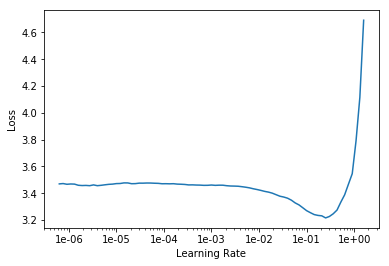

In [52]:
learn.recorder.plot()

In [53]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.449557,3.396216,0.041667,00:03


In [0]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [55]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.233495,3.317805,0.041667,00:03


In [56]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-3/(2.6**4),5e-03), moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,3.087827,3.331057,0.083333,00:05
1,3.069397,3.316871,0.104167,00:05
2,3.039941,3.288774,0.083333,00:05
3,3.019089,3.259871,0.104167,00:05
4,2.984929,3.220666,0.104167,00:05
5,2.952824,3.195321,0.083333,00:05
6,2.925974,3.187949,0.083333,00:05
7,2.893724,3.171582,0.083333,00:05


In [57]:
predict(test,learn)

(27, 8, 0.2962962962962963)


In [58]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.743050,3.129044,0.083333,00:05
1,2.748325,3.081120,0.104167,00:05
2,2.729351,3.018179,0.125000,00:05
3,2.696982,2.918897,0.104167,00:05
4,2.653393,2.799820,0.166667,00:05
5,2.616558,2.669498,0.187500,00:05
6,2.580656,2.590564,0.208333,00:05
7,2.541037,2.517446,0.229167,00:05
8,2.501504,2.461553,0.312500,00:05
9,2.454523,2.387626,0.312500,00:05


In [59]:
predict(test,learn)

(27, 12, 0.4444444444444444)


In [60]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.037700,2.289408,0.333333,00:05
1,2.060606,2.270627,0.333333,00:05
2,2.058736,2.224133,0.354167,00:05
3,2.024512,2.157565,0.395833,00:05
4,2.012895,2.094438,0.375000,00:05
5,1.967889,2.036194,0.354167,00:05
6,1.932263,2.016378,0.354167,00:05
7,1.888053,1.987859,0.354167,00:05
8,1.841544,1.942951,0.375000,00:05
9,1.818002,1.924644,0.395833,00:05


In [61]:
predict(test,learn)

(27, 18, 0.6666666666666666)


In [62]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.544565,1.841526,0.354167,00:05
1,1.561092,1.836465,0.395833,00:05
2,1.573796,1.832475,0.395833,00:05
3,1.539145,1.816459,0.375000,00:05
4,1.539205,1.788883,0.354167,00:05
5,1.512293,1.819073,0.395833,00:05
6,1.491278,1.806888,0.354167,00:05
7,1.465539,1.754524,0.395833,00:05
8,1.436620,1.807366,0.416667,00:05
9,1.419234,1.781833,0.416667,00:05


In [63]:
predict(test,learn)

(27, 17, 0.6296296296296297)


In [64]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.244504,1.737876,0.416667,00:05
1,1.274736,1.758088,0.458333,00:05
2,1.230799,1.668672,0.458333,00:05
3,1.255934,1.631838,0.458333,00:05
4,1.244877,1.575063,0.479167,00:05
5,1.229647,1.573841,0.458333,00:05
6,1.201342,1.602775,0.437500,00:05
7,1.195755,1.626444,0.437500,00:05
8,1.176603,1.641559,0.479167,00:05
9,1.179401,1.724574,0.479167,00:05


In [65]:
predict(test,learn)

(27, 17, 0.6296296296296297)


In [66]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.102155,1.664904,0.479167,00:05
1,1.089815,1.699318,0.520833,00:05
2,1.100375,1.692660,0.479167,00:05
3,1.104066,1.675216,0.479167,00:05
4,1.098219,1.750159,0.479167,00:05
5,1.090473,1.731081,0.500000,00:05
6,1.078827,1.735011,0.458333,00:05
7,1.070136,1.773585,0.479167,00:05
8,1.040254,1.734999,0.479167,00:05
9,1.032173,1.750430,0.458333,00:05


In [67]:
predict(test,learn)

(27, 16, 0.5925925925925926)


In [68]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.877190,1.679646,0.500000,00:05
1,0.918006,1.686683,0.500000,00:05
2,0.931400,1.698409,0.500000,00:05
3,0.915403,1.679263,0.500000,00:05
4,0.893363,1.620760,0.541667,00:05
5,0.880463,1.688663,0.520833,00:05
6,0.886776,1.630825,0.541667,00:05
7,0.876624,1.668409,0.520833,00:05
8,0.885774,1.748735,0.541667,00:05
9,0.875962,1.710351,0.500000,00:05


In [69]:
predict(test,learn)

(27, 17, 0.6296296296296297)


In [70]:
learn.fit_one_cycle(32, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.832689,1.616619,0.520833,00:05
1,0.827950,1.625470,0.520833,00:05
2,0.811581,1.602315,0.520833,00:05
3,0.829169,1.585354,0.541667,00:05
4,0.829078,1.612017,0.520833,00:05
5,0.842934,1.572385,0.562500,00:05
6,0.844970,1.584670,0.541667,00:05
7,0.853627,1.543341,0.541667,00:05
8,0.866483,1.536057,0.520833,00:05
9,0.863195,1.525325,0.520833,00:05


In [71]:
predict(test,learn)

(27, 19, 0.7037037037037037)


In [72]:
learn.fit_one_cycle(32, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.621921,1.388497,0.541667,00:05
1,0.673538,1.413609,0.541667,00:05
2,0.681808,1.417962,0.541667,00:05
3,0.709324,1.386613,0.541667,00:05
4,0.735359,1.371280,0.562500,00:05
5,0.711844,1.363018,0.541667,00:05
6,0.689679,1.383020,0.541667,00:05
7,0.703752,1.350107,0.541667,00:05
8,0.717334,1.391523,0.500000,00:05
9,0.716645,1.364831,0.562500,00:05


In [73]:
predict(test,learn)

(27, 21, 0.7777777777777778)


In [76]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(48, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(48, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.8)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in_features=50, out_features=30, bias=True)
    )
  )
)